## Feature Engineering

Feature Engineering is crucial in Machine Learning. It involves selecting, transforming, and creating features from raw data to improve model performance and interpretability. Effective feature engineering can significantly enhance the predictive power and generalization ability of machine learning models.

Yesterday, in the KNN Regression aproach, we saw a pretty poor model. Let's apply some feature engineering techniques to see if it improves our model.

In [5]:
import pandas as pd
import numpy as np

In [6]:
# example to show importance of data scaling

my_dict={'age':[20, 22, 60],
         'height':[1.81, 1.83, 1.98],
         'weight': [75, 77, 86],
         'salary': [32000, 28000, 31000]}
df= pd.DataFrame.from_dict(my_dict, orient="columns")
df.head()

,age,height,weight,salary
0,20,1.81,75,32000
1,22,1.83,77,28000
2,60,1.98,86,31000


In [7]:
def distance_individual_zero(row):
    distance = (row["age"]-20)**2 + (row["height"]-1.81)**2 + (row["weight"]-75)**2 + (row["salary"]-32000)**2
    return np.sqrt(distance)

df.apply(distance_individual_zero, axis=1)

0       0.000000
1    4000.001000
2    1000.860145
dtype: float64

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,age,height,weight,salary
0,0.00,0.000000,0.000000,1.00
1,0.05,0.117647,0.181818,0.00
2,1.00,1.000000,1.000000,0.75


In [9]:
def distance_individual_zero(row):
    distance = (row["age"]-0.00)**2 + (row["height"]-0.00)**2 + (row["weight"]-0.00)**2 + (row["salary"]-1)**2
    return np.sqrt(distance)

df_scaled.apply(distance_individual_zero, axis=1)

0    0.000000
1    1.024402
2    1.750000
dtype: float64

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,age,height,weight,salary
0,-0.760750,-0.834812,-0.905753,0.980581
1,-0.652071,-0.571187,-0.487713,-1.372813
2,1.412821,1.405999,1.393466,0.392232


In [11]:
def distance_individual_zero(row):
    distance = (row["age"]-(-0.760750))**2 + (row["height"]-(-0.834812))**2 + (row["weight"]-(-0.905753))**2 + (row["salary"]-0.980581)**2
    return np.sqrt(distance)

df_scaled.apply(distance_individual_zero, axis=1)

0    4.335532e-07
1    2.407183e+00
2    3.921506e+00
dtype: float64

In [12]:
0.0000004335532

4.335532e-07

#### Loading and preparing the data

In [13]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [14]:
california = fetch_california_housing()
df_cali = pd.DataFrame(california['data'], columns = california['feature_names'])
df_cali['median_house_value'] = california['target']
df_cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Checking for anomalies

In [15]:
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Train Test Split

In [16]:
features = df_cali.drop(columns = "median_house_value")
target = df_cali["median_house_value"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

#### Normalization

During normalization or standardization, it's essential to fit the model to the training data exclusively, preventing any exposure to the test data to avoid potential data leakage issues.

Create an instance of the normalizer

In [18]:
normalizer = MinMaxScaler()

Fit it to our training data

In [19]:
normalizer.fit(X_train)

MinMaxScaler()

Transforming our training and testing data

In [20]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12069,4.2386,6.0,7.723077,1.169231,228.0,3.507692,33.83,-117.55
15925,4.3898,52.0,5.326622,1.100671,1485.0,3.322148,37.73,-122.44
11162,3.9333,26.0,4.668478,1.046196,1022.0,2.777174,33.83,-118.00
4904,1.4653,38.0,3.383495,1.009709,749.0,3.635922,34.01,-118.26
4683,3.1765,52.0,4.119792,1.043403,1135.0,1.970486,34.08,-118.36


In [23]:
X_train_norm = pd.DataFrame(normalizer.transform(X_train), columns=X_train.columns)

X_test_norm = pd.DataFrame(normalizer.transform(X_test), columns=X_test.columns)

When applying transformations of our dataframe, normalizer will return an array instead of a dataframe object

In [11]:
#your code here

##### KNN Regressor - modeling

Let's create an instance of KNN with the same hyperparameter as before, n_neighbors = 10.

In [24]:
knn = KNeighborsRegressor(n_neighbors=10)

Training KNN to our normalized data

In [25]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

Evaluate model's performance

In [27]:
from sklearn.metrics import r2_score, mean_squared_error

pred = knn.predict(X_test_norm)

print('r2_score:', r2_score(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred, squared=False))

r2_score: 0.69908705146437
MSE: 0.6263999636119313


With raw data we obtain a R2 of 0.16, just by normalizing our data, model's perfomance increase a lot to a R2 of 0.70.

This happens because KNN is a distance based algorithm, so its suffers a lot with data in completely different scales.

## Feature Selection

Even though normalizing our data had a huge impact on KNN performance, we are currently using every single feature of the dataset.

Now let's do a selection of features based on correlactions between themselves but also with the target.

We want low correlaction between features, but high correlaction between features and our target.

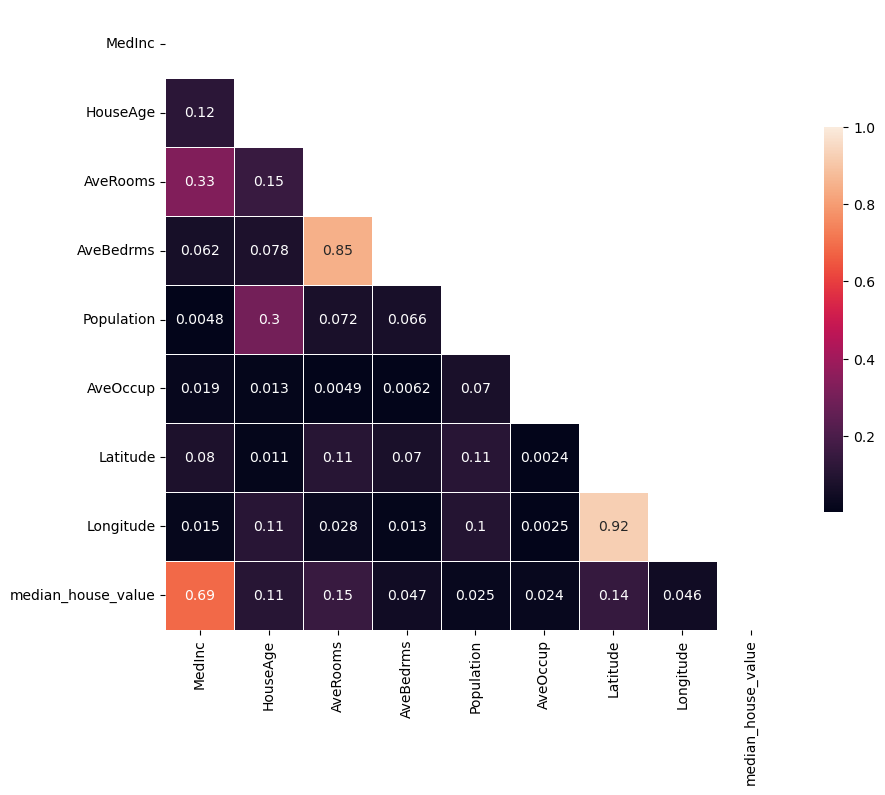

In [28]:
corr=np.abs(df_cali.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

By the correlation matrix we can see that:
- "AveRooms" is highly correlated with "AveBedrms", so we drop the one less correlated with our target
- "AveOccup" and "Population" also have pretty low correlation with our target variable, so lets remove them from our selected features

In [29]:
X_train_reduced = X_train_norm.drop(columns = ["AveOccup", "Population", "AveBedrms"])
X_test_reduced = X_test_norm.drop(columns = ["AveOccup", "Population", "AveBedrms"])

In [30]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_reduced, y_train)

KNeighborsRegressor(n_neighbors=10)

In [31]:
from sklearn.metrics import r2_score, mean_squared_error

pred = knn.predict(X_test_reduced)

print('r2_score:', r2_score(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred, squared=False))

r2_score: 0.7040267084262604
MSE: 0.6212373334739458


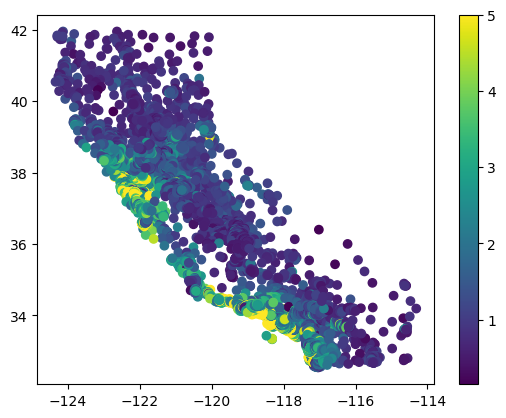

In [33]:
plt.scatter(df_cali["Longitude"], df_cali["Latitude"], c = df_cali["median_house_value"])
plt.colorbar()
plt.show()

By normalizing our data and selecting a subset of available features, we were able to massively improve our model, increasing the R2 score from 0.16 to 0.70

Notice that we still haven't fine-tuned our hyperparameter, so we will be able to improve even more our model.